In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("iris.csv")
df.head()


,sepallength,sepalwidth,petallength,petalwidth,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# iris = df.rename(columns = {' ' : "ID"})
# iris.head()
print(df.columns)

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species'], dtype='object')


In [4]:
df["ID"] = range(1, len(df) +1)
df.head()

,sepallength,sepalwidth,petallength,petalwidth,species,ID
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,2
2,4.7,3.2,1.3,0.2,Iris-setosa,3
3,4.6,3.1,1.5,0.2,Iris-setosa,4
4,5.0,3.6,1.4,0.2,Iris-setosa,5


In [5]:
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df

,ID,sepallength,sepalwidth,petallength,petalwidth,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df["species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64

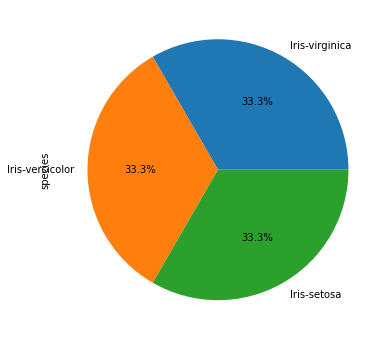

In [7]:
df.species.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(6,6))

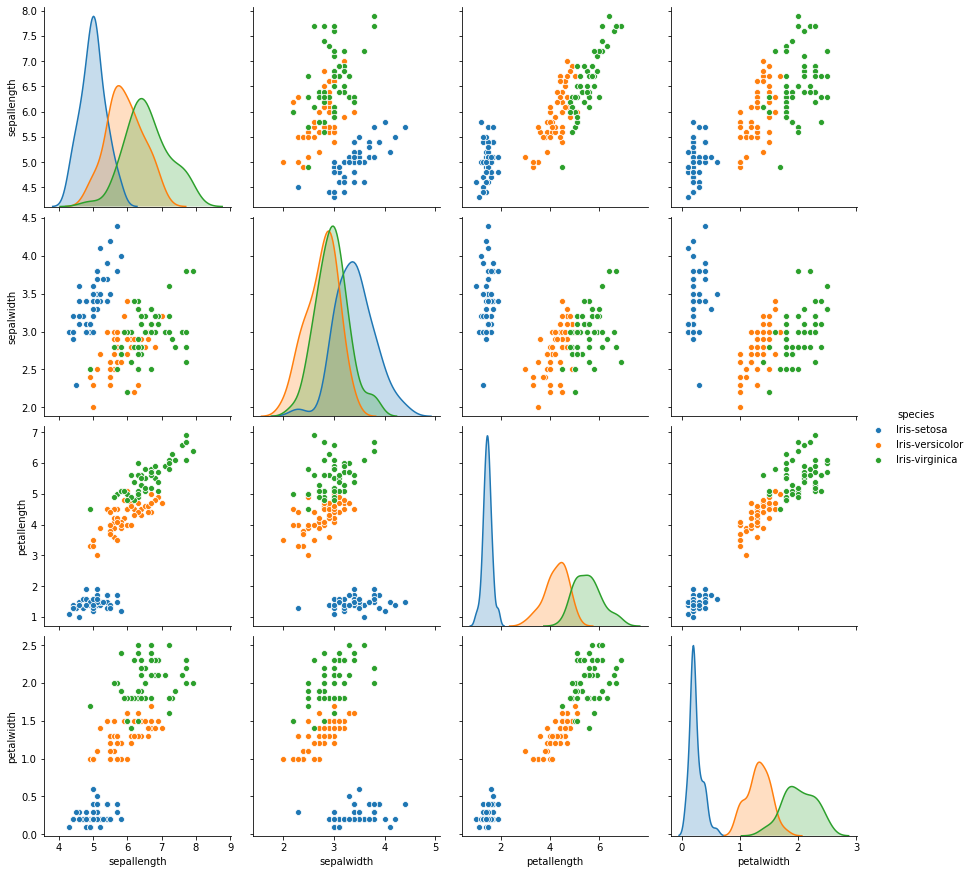

In [9]:
sns.pairplot(df.drop("ID",axis=1), hue="species", size=3)

In [12]:
y = df.species
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [18]:
X = df.drop(["species", "ID"], axis = 1)
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [23]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc = StandardScaler()
X = sc.fit_transform(X)
X[0:10]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673],
       [-0.53717756,  1.95766909, -1.17067529, -1.05003079],
       [-1.50652052,  0.80065426, -1.3412724 , -1.18150376],
       [-1.02184904,  0.80065426, -1.2844067 , -1.31297673],
       [-1.74885626, -0.35636057, -1.3412724 , -1.31297673],
       [-1.14301691,  0.10644536, -1.2844067 , -1.4444497 ]])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [29]:
print("Train size", X_train.shape, y_train.shape)
print("Test size ", y_test.shape, X_test.shape)

Train size (120, 4) (120,)
Test size  (30,) (30, 4)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors =5)

In [43]:
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(y_test[0:5])
pred[0:5]

[0 1 1 0 2]


array([0, 1, 1, 0, 2], dtype=int32)

In [44]:
accuracy = accuracy_score(y_test, pred)
print("KNN accuracy %.2f" %accuracy)

KNN accuracy 0.97


In [45]:
from sklearn import tree

# Train the decision tree
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
accuracy = accuracy_score(y_test, prediction) * 100
print('Decision Tree accuracy | ' + str(round(accuracy, 2)) + ' %.')

Decision Tree accuracy | 96.67 %.


In [48]:
import graphviz 

# Visualize Decision Tree
X_train = (X_train * X_train.std()) + X_train.mean()
dot_data = tree.export_graphviz(model, out_file=None, feature_names=df.drop(["ID", "species"], axis=1).keys(), class_names=df["species"].unique(), filled=True, rounded=True, special_characters=True)  
graphviz.Source(dot_data)  

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH